In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
item_rating = pd.read_csv(r'C:\Users\smmanrrique\3D Objects\unizar\magvd_imdb\miscelaneos\learning-from-sets-2019\item_ratings.csv')
df_sr = pd.read_csv(r'C:\Users\smmanrrique\3D Objects\unizar\magvd_imdb\miscelaneos\learning-from-sets-2019\set_ratings.csv')
movies = pd.read_csv(r'C:\Users\smmanrrique\3D Objects\unizar\magvd_imdb\miscelaneos\ml-25m\movies.csv')


In [ ]:
df = pd.merge(item_rating, movies, on='movieId')

df.describe()

In [ ]:
ratings = pd.DataFrame(df.groupby('movieId')['rating'].mean())
ratings['ratings_number'] = df.groupby('movieId')['rating'].count()


In [ ]:
# %matplotlib inlin
ratings['rating'].hist().hist(bins=50)

In [ ]:
ratings['ratings_number'].hist(bins=60)

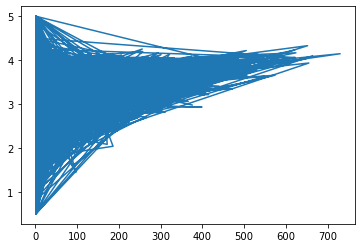

In [20]:
plt.plot(ratings['ratings_number'], ratings['rating'])



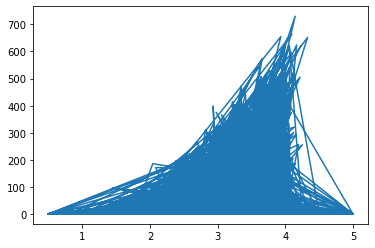

In [19]:
plt.plot(ratings['rating'], ratings['ratings_number'])

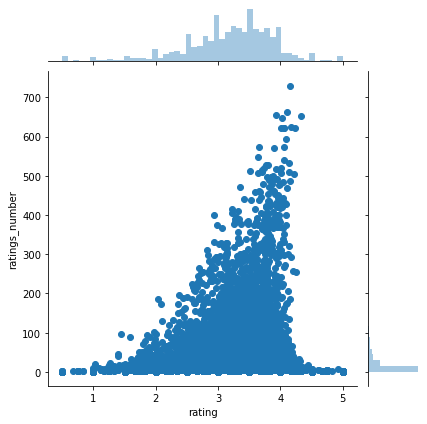

In [23]:
sns.jointplot(x='rating', y='ratings_number', data=ratings)


In [30]:
movie_matrix = df.pivot_table(index='userId', columns='movieId', values='rating')
movie_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,154321,154327,154346,154356,154436,155022,155086,155100,155104,155641
userId,,,,,,,,,,,,,,,,,,,,,
0011a9baea,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00be0326d6,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00d8a48617,NaN,1.0,1.5,NaN,NaN,NaN,2.0,NaN,NaN,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0116910e54,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0165b89cac,4.5,2.5,2.0,NaN,2.0,4.0,NaN,NaN,NaN,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
ratings.sort_values('ratings_number', ascending=False).head(10)

,rating,ratings_number
movieId,,
2571,4.146575,730
79132,4.097139,664
356,3.935115,655
318,4.329755,652
4993,4.028549,648
296,4.167468,624
5952,4.003210,623
7153,4.064309,622
58559,4.057971,621


In [38]:
ratings2 = pd.merge(ratings, movies, on='movieId')
ratings2.sort_values('ratings_number', ascending=False).head(10)

,movieId,rating,ratings_number,title,genres
1798,2571,4.146575,730,"Matrix, The (1999)",Action|Sci-Fi|Thriller
8580,79132,4.097139,664,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
265,356,3.935115,655,Forrest Gump (1994),Comedy|Drama|Romance|War
232,318,4.329755,652,"Shawshank Redemption, The (1994)",Crime|Drama
3472,4993,4.028549,648,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
214,296,4.167468,624,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4023,5952,4.003210,623,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
4772,7153,4.064309,622,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
7460,58559,4.057971,621,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
2062,2959,4.229469,621,Fight Club (1999),Action|Crime|Drama|Thriller


In [39]:
AFO_user_rating = movie_matrix[1608]
contact_user_rating = movie_matrix[1584]

In [42]:
AFO_user_rating.head()


userId
0011a9baea    NaN
00be0326d6    NaN
00d8a48617    NaN
0116910e54    NaN
0165b89cac    3.0
Name: 1608, dtype: float64

In [43]:
contact_user_rating.head()


userId
0011a9baea    NaN
00be0326d6    NaN
00d8a48617    4.0
0116910e54    NaN
0165b89cac    3.5
Name: 1584, dtype: float64

In [45]:
similar_to_air_force_one =movie_matrix.corrwith(AFO_user_rating)

c:\users\smmanrrique\3d objects\unizar\magvd_imdb\env\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\smmanrrique\3d objects\unizar\magvd_imdb\env\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [50]:
similar_to_air_force_one.head(10).sort_values(ascending=False)

movieId
5     0.556900
10    0.484718
4     0.467397
2     0.409455
7     0.395955
8     0.372104
3     0.288303
1     0.240188
6     0.156541
9    -0.184238
dtype: float64

In [51]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)

c:\users\smmanrrique\3d objects\unizar\magvd_imdb\env\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\smmanrrique\3d objects\unizar\magvd_imdb\env\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [63]:
similar_to_contact.sort_values(ascending=False).head(500)

movieId
74448     1.000000
51498     1.000000
136305    1.000000
57940     1.000000
98373     1.000000
            ...   
90933     0.944911
3371      0.944911
26925     0.944911
58107     0.944911
27402     0.944911
Length: 500, dtype: float64

In [65]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()



,correlation
movieId,
1,0.240188
2,0.409455
3,0.288303
4,0.467397
5,0.556900


In [66]:
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
movieId,
1,0.240188
2,0.409455
3,0.288303
4,0.467397
5,0.556900


In [70]:
corr_AFO = corr_AFO.join(ratings['ratings_number'])
corr_contact = corr_contact.join(ratings['ratings_number'])

In [95]:
corr_AFO.sort_values(by=['correlation','ratings_number'],ascending=False, ignore_index=True)

,correlation,ratings_number
0,1.0,217
1,1.0,18
2,1.0,17
3,1.0,17
4,1.0,12
...,...,...
8844,-1.0,2
8845,-1.0,2
8846,-1.0,2
8847,-1.0,2


In [72]:
corr_contact.head()

,Correlation,ratings_number
movieId,,
1,0.063309,529
2,0.186028,300
3,0.233824,59
4,0.257130,15
5,0.178836,81


In [96]:
corr_AFO[corr_AFO['ratings_number'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,ratings_number
movieId,,
1608,1.000000,217
1552,0.642964,216
5419,0.628821,101
539,0.617624,211
37727,0.615983,109
56775,0.610313,171
1544,0.604271,232
44022,0.601286,160
2953,0.592143,160


In [98]:
corr_contact[corr_contact['ratings_number'] > 100].sort_values(by='Correlation', ascending=False).head(10)


,Correlation,ratings_number
movieId,,
1584,1.000000,268
47200,0.478360,129
1127,0.473383,196
86833,0.455910,134
5690,0.451763,103
4223,0.449882,150
909,0.437981,102
49274,0.435327,119
102903,0.434429,179
